In [137]:
import numpy as np
import pandas as pd
import os
os.chdir('C:\\Users\\fangc\\Documents\\airbnb\\Airbnb Project')
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
df1=pd.read_csv('Guest_1.csv')
df1.dropna(inplace=True)
df2=pd.read_csv('Guest_2.csv')
df2.dropna(inplace=True)
df3=pd.read_csv('Guest_3.csv')
df3.dropna(inplace=True)
df4=pd.read_csv('Guest_4.csv')
df4.dropna(inplace=True)
df5=pd.read_csv('Guest_5.csv')
df5.dropna(inplace=True)
df6=pd.read_csv('Guest_6.csv')
df6.dropna(inplace=True)
df7=pd.read_csv('Guest_7.csv')
df7.dropna(inplace=True)
df8=pd.read_csv('Guest_8.csv')
df8.dropna(inplace=True)
df9=pd.read_csv('Guest_9.csv')
df9.dropna(inplace=True)
df10=pd.read_csv('Guest_10.csv')
df10.dropna(inplace=True)
df11=pd.read_csv('Guest_11.csv')
df11.dropna(inplace=True)
df12=pd.read_csv('Guest_12.csv')
df12.dropna(inplace=True)
df13=pd.read_csv('Guest_13.csv')
df13.dropna(inplace=True)
df14=pd.read_csv('Guest_14.csv')
df14.dropna(inplace=True)
df15=pd.read_csv('Guest_15.csv')
df15.dropna(inplace=True)
df16=pd.read_csv('Guest_16.csv')
df16.dropna(inplace=True)
df17=pd.read_csv('Guest_17.csv')
df17.dropna(inplace=True)
df18=pd.read_csv('Guest_18.csv')
df18.dropna(inplace=True)
df19=pd.read_csv('Guest_19.csv')
df19.dropna(inplace=True)

In [139]:
# collect history data
df=pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19])

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632 entries, 0 to 9
Data columns (total 13 columns):
Confirmation code    632 non-null object
Status               632 non-null object
Guest name           632 non-null object
Contact              632 non-null object
# of adults          632 non-null int64
# of children        632 non-null int64
# of infants         632 non-null int64
Start date           632 non-null object
End date             632 non-null object
# of nights          632 non-null int64
Booked               632 non-null object
Listing              632 non-null object
Earnings             632 non-null object
dtypes: int64(4), object(9)
memory usage: 69.1+ KB


In [141]:
df.Earnings=df.Earnings.replace('[\$,]', '', regex=True).astype(float)
df['Start date']= pd.to_datetime(df['Start date'])
df['End date']= pd.to_datetime(df['End date'])

In [142]:
# check the properties name 
df.Listing.unique()

array(['FULLY Furnished Silicon Valley Studio House',
       'Silicon Valley Entire Clean Modern 2B/2B Apartment',
       'Bay area Entire Luxury  1bedroom 1 bathroom',
       'Silicon Valley Brand new Private room (Newark) 欢迎',
       'Fully Furnished-Clean Cozy 3Bed2Bath House',
       'Silicon Valley 2000 SQ/FT Luxury 3B/2.5B Condo',
       'Cozy House in Center Fremont', 'Cozy House in Downtown Fremont',
       'Relaxing Bay area style cozy place',
       'Milpitas Master bedroom with Private Bathroom',
       'Beautiful spacious  3 bdrm 1 officerm luxury home',
       'Independent house with two bed rooms for move in',
       'Serene 1 bedroom studio in Santa Clara',
       'Serene 2 bedroom house in Los Altos',
       'Large & Convenient SanJose downtown 1bed1bath',
       'Spectacular 3B2B home@ Santa Clara',
       'Atherton Luxury 1bedroom 1bath close to Stanford',
       'Cozy private room with 2 beds',
       'Cozy and Modern house in Center Fremont'], dtype=object)

In [143]:
# Queried studio data
df_studio = df[(df.Listing =='FULLY Furnished Silicon Valley Studio House') | (df.Listing =='Serene 1 bedroom studio in Santa Clara')]


In [144]:
#adjust the real earning after subtracting the cleaning fee.
df_studio.Earnings=df_studio.Earnings-50
#compute price per night
df_studio['price_per_night']=df_studio.Earnings/df_studio['# of nights']
#Change the price type as an integer
df_studio.price_per_night=df_studio.price_per_night.astype(int)

C:\Users\fangc\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\fangc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [145]:
df_studio.head()

,Confirmation code,Status,Guest name,Contact,# of adults,# of children,# of infants,Start date,End date,# of nights,Booked,Listing,Earnings,price_per_night
0,HMQM5YMPQC,Confirmed,Lukasz Majewski,'+48 793 641 008,2,0,0,2017-12-17,2018-02-28,73,12/4/2017,FULLY Furnished Silicon Valley Studio House,4714.41,64
18,HMQYF9FZY8,Confirmed,Apurva Karve,'+1 (408) 242-5905,2,0,0,2018-02-28,2018-03-03,3,2/18/2018,FULLY Furnished Silicon Valley Studio House,246.82,82
21,HMMYC3E325,Confirmed,Jodi Boone,'+1 (206) 612-4804,2,0,0,2018-03-05,2018-03-09,4,1/28/2018,FULLY Furnished Silicon Valley Studio House,410.75,102
28,HM344HKFAS,Confirmed,Cassie Chen,'+1 (650) 996-6648,2,0,0,2018-03-10,2018-03-11,1,3/10/2018,FULLY Furnished Silicon Valley Studio House,64.46,64
30,HMT2NQPJ8C,Confirmed,Monica Stricklin,'+1 (404) 992-9382,1,0,0,2018-03-11,2018-03-14,3,3/9/2018,FULLY Furnished Silicon Valley Studio House,246.82,82


In [146]:
# Export the price
df_studio.price_per_night.describe()

count     91.000000
mean      88.626374
std       15.421953
min       61.000000
25%       79.000000
50%       89.000000
75%       99.000000
max      133.000000
Name: price_per_night, dtype: float64

(0, 200)

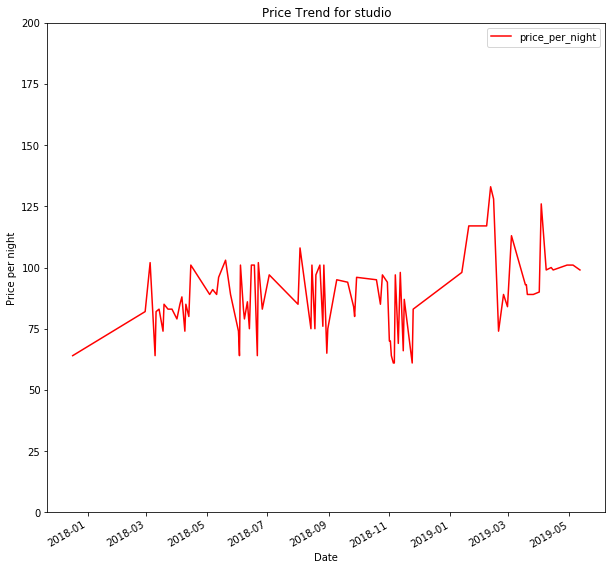

In [147]:
#plot price trend
df_studio.plot(x='Start date',y='price_per_night',figsize=(10,10),color='Red',title='Price Trend for studio')
plt.xlabel('Date')
plt.ylabel('Price per night')
plt.ylim(0,200)

In [197]:
df_1B1B= df[(df.Listing =='Bay area Entire Luxury  1bedroom 1 bathroom') | (df.Listing =='Relaxing Bay area style cozy place')]

In [198]:
df_1B1B.reset_index(drop=True,inplace=True)

In [199]:
df_1B1B.Earnings=df_1B1B.Earnings-59
df_1B1B['price_per_night']=df_1B1B.Earnings/df_1B1B['# of nights']
df_1B1B.price_per_night=df_1B1B.price_per_night.astype(int)

C:\Users\fangc\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\fangc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [200]:
#drop outlier
outliers=[]
Q1 = np.percentile(df_1B1B.price_per_night,25)
    
Q3 = np.percentile(df_1B1B.price_per_night,75)
    
step = 1.5*(Q3-Q1)
outliers_row=df_1B1B[~((df_1B1B.price_per_night>= Q1 - step) & (df_1B1B.price_per_night <= Q3 + step))]
outliers  = outliers+list(outliers_row.index.values)

In [201]:
df_1B1B=df_1B1B.drop(df_1B1B.index[outliers]).reset_index(drop = True)

In [203]:
df_1B1B.price_per_night.describe()

count    129.000000
mean     135.550388
std       24.923621
min       76.000000
25%      121.000000
50%      141.000000
75%      151.000000
max      181.000000
Name: price_per_night, dtype: float64

(0, 200)

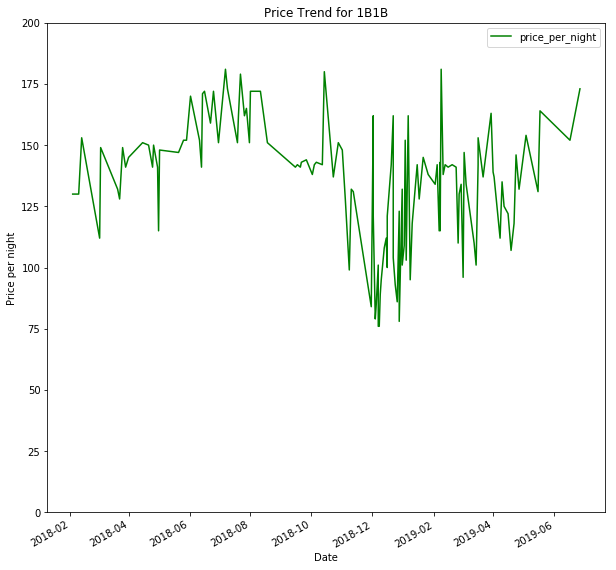

In [204]:
df_1B1B.plot(x='Start date',y='price_per_night',figsize=(10,10),color='green',title='Price Trend for 1B1B')
plt.xlabel('Date')
plt.ylabel('Price per night')
plt.ylim(0,200)

In [309]:
df_2B2B= df[(df.Listing =='Silicon Valley Entire Clean Modern 2B/2B Apartment') | (df.Listing =='Fully Furnished-Clean Cozy 3Bed2Bath House')]

In [310]:
df_2B2B.reset_index(drop=True,inplace=True)

In [311]:
df_2B2B.Earnings=df_2B2B.Earnings-69
df_2B2B['price_per_night']=df_2B2B.Earnings/df_2B2B['# of nights']
df_2B2B.price_per_night=df_2B2B.price_per_night.astype(int)

C:\Users\fangc\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\fangc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [312]:

def drop_outliers(df):
    outliers=[]
    Q1 = np.percentile(df.price_per_night,25)
    
    Q3 = np.percentile(df.price_per_night,75)
    
    step = 1.5*(Q3-Q1)
    outliers_row=df[~((df.price_per_night>= Q1 - step) & (df.price_per_night <= Q3 + step))]
    outliers  = outliers+list(outliers_row.index.values)
    return outliers

In [313]:
ourliers=drop_outliers(df_2B2B)

In [314]:
df_2B2B=df_2B2B.drop(df_2B2B.index[ourliers]).reset_index(drop = True)

In [315]:
df_2B2B.price_per_night.describe()

count    106.000000
mean     163.339623
std       13.039053
min      124.000000
25%      152.000000
50%      164.500000
75%      171.750000
max      195.000000
Name: price_per_night, dtype: float64

(0, 200)

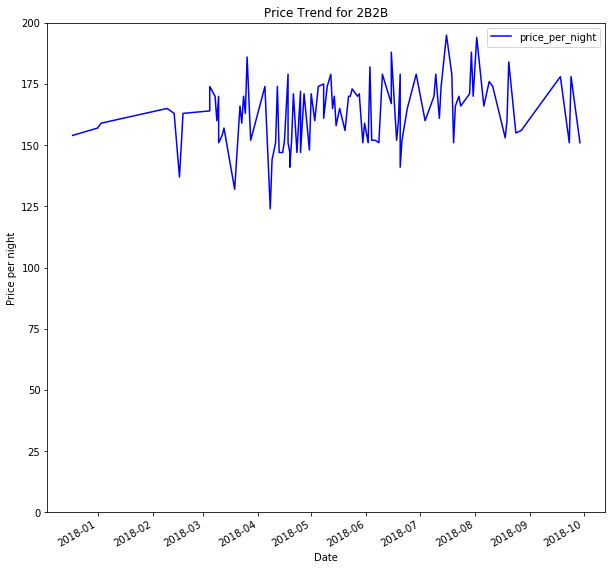

In [316]:
df_2B2B.plot(x='Start date',y='price_per_night',figsize=(10,10),color='blue',title='Price Trend for 2B2B')
plt.xlabel('Date')
plt.ylabel('Price per night')
plt.ylim(0,200)

In [230]:
df_3B2B= df[(df.Listing =='Silicon Valley 2000 SQ/FT Luxury 3B/2.5B Condo') | (df.Listing =='Spectacular 3B2B home@ Santa Clara')]

In [231]:
df_3B2B.reset_index(drop=True,inplace=True)

In [232]:
df_3B2B.Earnings=df_3B2B.Earnings-100
df_3B2B['price_per_night']=df_3B2B.Earnings/df_3B2B['# of nights']
df_3B2B.price_per_night=df_3B2B.price_per_night.astype(int)

C:\Users\fangc\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\fangc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [234]:
ourliers=drop_outliers(df_3B2B)
print(ourliers)

[2, 11, 14, 25, 44, 55, 57, 58, 60, 61]


In [236]:
ourliers=[2,11,14,25,44]
df_3B2B=df_3B2B.drop(df_3B2B.index[ourliers]).reset_index(drop = True)

In [237]:
df_3B2B.price_per_night.describe()

count     57.000000
mean     238.385965
std       46.907871
min      158.000000
25%      215.000000
50%      234.000000
75%      250.000000
max      367.000000
Name: price_per_night, dtype: float64

(0, 400)

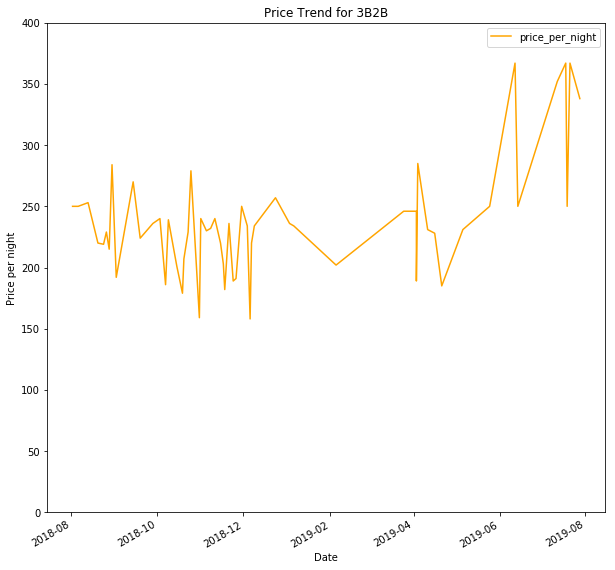

In [239]:
df_3B2B.plot(x='Start date',y='price_per_night',figsize=(10,10),color='orange',title='Price Trend for 3B2B')
plt.xlabel('Date')
plt.ylabel('Price per night')
plt.ylim(0,400)

In [254]:
df_2B2B_L= df[(df.Listing =='Atherton Luxury 1bedroom 1bath close to Stanford') | (df.Listing =='Serene 2 bedroom house in Los Altos')]

In [256]:
df_2B2B_L.reset_index(drop=True,inplace=True)

In [257]:
df_2B2B_L.Earnings=df_2B2B_L.Earnings-80
df_2B2B_L['price_per_night']=df_2B2B_L.Earnings/df_2B2B_L['# of nights']
df_2B2B_L.price_per_night=df_2B2B_L.price_per_night.astype(int)

C:\Users\fangc\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\fangc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [260]:
ourliers=drop_outliers(df_2B2B_L)
print(ourliers)

[10]


In [261]:
df_2B2B_L=df_2B2B_L.drop(df_2B2B_L.index[ourliers]).reset_index(drop = True)

In [262]:
df_2B2B_L.price_per_night.describe()

count     42.000000
mean     243.380952
std       34.552860
min      188.000000
25%      219.500000
50%      236.000000
75%      268.000000
max      313.000000
Name: price_per_night, dtype: float64

(0, 400)

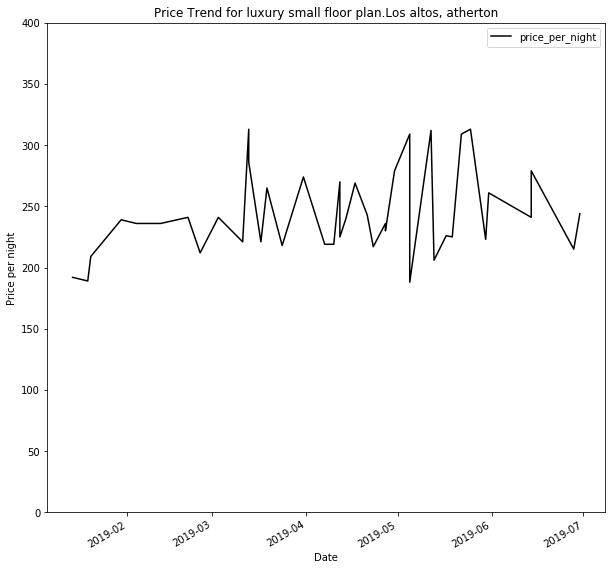

In [263]:
df_2B2B_L.plot(x='Start date',y='price_per_night',figsize=(10,10),color='black',title='Price Trend for luxury small floor plan.Los altos, atherton')
plt.xlabel('Date')
plt.ylabel('Price per night')
plt.ylim(0,400)

In [266]:
df_3B_n= df[(df.Listing =='Cozy House in Downtown Fremont') | (df.Listing =='Cozy House in Center Fremont')|(df.Listing =='Cozy and Modern house in Center Fremont')|(df.Listing =='Beautiful spacious  3 bdrm 1 officerm luxury home')]

In [269]:
df_3B_n.reset_index(drop=True,inplace=True)

In [270]:
df_3B_n.Earnings=df_3B_n.Earnings-80
df_3B_n['price_per_night']=df_3B_n.Earnings/df_3B_n['# of nights']
df_3B_n.price_per_night=df_3B_n.price_per_night.astype(int)

C:\Users\fangc\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\fangc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [271]:
ourliers=drop_outliers(df_3B_n)
print(ourliers)

[0, 3, 5, 37, 42, 47, 49, 51, 57, 58, 59, 62, 63, 65, 66, 70, 75, 76, 80]


In [276]:
df_3B_n=df_3B_n.drop(df_3B_n.index[ourliers]).reset_index(drop = True)

In [277]:
df_3B_n.price_per_night.describe()

count     95.000000
mean     186.694737
std       50.304408
min      120.000000
25%      149.000000
50%      171.000000
75%      218.500000
max      356.000000
Name: price_per_night, dtype: float64

(0, 400)

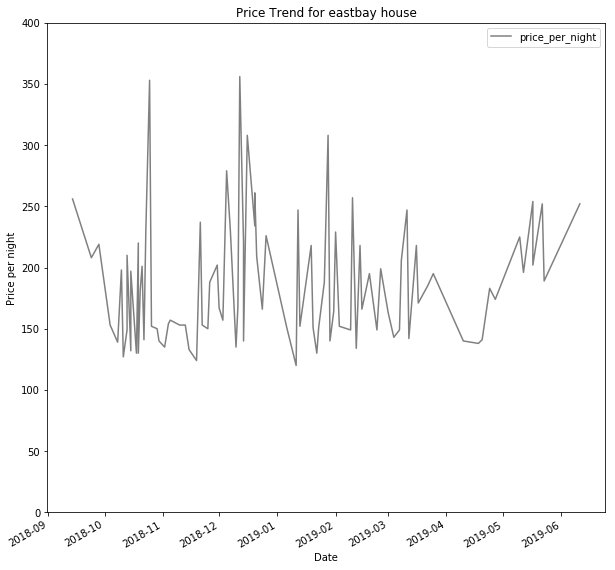

In [279]:
df_3B_n.plot(x='Start date',y='price_per_night',figsize=(10,10),color='grey',title='Price Trend for eastbay house')
plt.xlabel('Date')
plt.ylabel('Price per night')
plt.ylim(0,400)

In [5]:
import numpy as np
import pandas as pd
import os
os.chdir('C:\\Users\\fangc\\Documents\\airbnb\\Business plan')
import matplotlib.pyplot as plt
%matplotlib inline

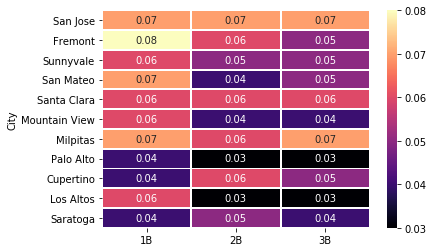

In [6]:
df=pd.read_csv('return ratio.csv',index_col=0)

import seaborn as sns
sns.heatmap(df,cmap='magma',linecolor='white',linewidths=1,annot=True)

The lighter, the more return rate on properties if people are doing Airbnb business. 